In [1]:
import os
import glob

# Data handling and manipulation library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Set print options
pd.set_option('display.max_columns', None)

### some stuff for making pretty plots
from matplotlib import rcParams
from cycler import cycler
## Set plotting style and print options
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper") #Possible are paper, notebook, talk and poster
# Set figure format
wide_format, square_format = False, True
if wide_format:
    d = {'lines.linewidth': 2, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12,\
     'legend.fontsize': 15, 'font.family': 'serif', 'figure.figsize': (9,6)}
if square_format:
    d = {'lines.linewidth': 2, 'axes.titlesize': 16, 'axes.labelsize': 14, 'xtick.labelsize': 10, 'ytick.labelsize': 10,\
     'legend.fontsize': 12, 'font.family': 'serif', 'figure.figsize': (6,6)}
    
d_colors = {'axes.prop_cycle': cycler(color = ['teal', 'navy', 'coral', 'plum', 'purple', 'olivedrab',\
         'black', 'red', 'cyan', 'yellow', 'khaki','lightblue'])}
rcParams.update(d)
rcParams.update(d_colors)

In [8]:
# Set the path to the data directory
data_dir = "../../../Indication Insights Data-20240905"

# List all files in the data directory
files = glob.glob(os.path.join(data_dir, '*.csv'))
file_names = os.listdir(data_dir)
file_names = [file.lower() for file in file_names if file.endswith('.csv')]

# Load all data files into a dictionary
df_dict = {}
for file in files:
    df = pd.read_csv(file, sep=';',encoding='iso-8859-1')
    df_dict[os.path.basename(file).lower().split('.csv')[0]] = df

keys = list(df_dict.keys())
file_names

['diagnosis_groups.csv',
 'diagnosis_groups_sks diagnoser.csv',
 'diagnosis_groups_spa.csv',
 'dosing.csv',
 'hospital_account.csv',
 'hospital_region.csv',
 'salgs_data_indication_insight_hospital.csv',
 'salgs_data_indication_insight_pharmacy.csv',
 'substancesofinterest.csv',
 'tabel_sks_diagnose_country.csv',
 'tabel_sks_diagnose_hospital.csv',
 'tabel_sks_diagnose_region.csv']

In [11]:
file7 = 'salgs_data_indication_insight_hospital'
sales_ins = df_dict[file7]

In [16]:
cols_to_format = ['Region', 'Account Description']

# print unique values and their frequency for each column
for col in cols_to_format:
    print(sales_ins[col].value_counts())

Region
Syddanmark     1834
SjÃ¦lland      1139
Midtjylland     750
Hovedstaden     653
Nordjylland     411
Name: count, dtype: int64
Account Description
4060 Centralapoteket, Region Hovedstaden          653
4100 Ãrhus Kommunehospitalet, apoteket           602
4070 SjÃ¦llands Universitetshospital, Roskilde    572
4120 Odense Universitetshospital                  570
4130 Aalborg Sygehus, apoteket                    411
4160 Kolding Sygehus, apoteket                    374
4378 Esbjerg Centralsygehus, apoteket             346
4397 SÃ¸nderborg Sygehus, apoteket                296
4376 NÃ¦stved Sygehus, apoteket                   280
4170 Vejle Sygehus, apoteket                      248
4375 NykÃ¸bing F. sygehus, apoteket               173
4398 Viborg Sygehus, apoteket                      94
4091 Slagelse Sygehus, apoteksfilial               64
4379 Herning Centralsygehus, apoteket              54
4090 HolbÃ¦k Sygehus, apoteket                     50
Name: count, dtype: int64


In [17]:
# rename 'ï»¿Year Month' column to 'Year Month'
sales_ins.rename(columns={'ï»¿Year Month': 'Year Month'}, inplace=True)

# replace the weird characters in the columns with æ, ø, å
for col in cols_to_format:
    sales_ins[col] = sales_ins[col].apply(lambda x: x.replace('Ã¸','ø'))
    sales_ins[col] = sales_ins[col].apply(lambda x: x.replace('Ã\x98','ø'))
    sales_ins[col] = sales_ins[col].apply(lambda x: x.replace('Ã¦','æ'))
    sales_ins[col] = sales_ins[col].apply(lambda x: x.replace('Ã\x86','æ'))
    sales_ins[col] = sales_ins[col].apply(lambda x: x.replace('Ã¥','å'))
    sales_ins[col] = sales_ins[col].apply(lambda x: x.replace('Ã','aa'))

sales_ins.head(8)

,Year Month,Region,Account Description,Product,Size,Size Numeric,Strength,WHO ATC 5 Code,Volume,Value
0,201001,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Cimzia,2 stk.,2,200 mg,L04AB05,19,"160820,1"
1,201001,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Remicade,1 htgl. a 100 mg,100,100 mg,L04AB02,2096,"9236652,8"
2,201001,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Stelara,1 stk,1,"45 mg/0,5 ml",L04AC05,23,"622716,26"
3,201002,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Cimzia,2 stk.,2,200 mg,L04AB05,11,"88919,05"
4,201002,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Remicade,1 htgl. a 100 mg,100,100 mg,L04AB02,2036,"8972244,8"
5,201002,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Stelara,1 stk,1,"45 mg/0,5 ml",L04AC05,28,"758089,36"
6,201003,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Cimzia,2 stk.,2,200 mg,L04AB05,14,"113169,7"
7,201003,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Remicade,1 htgl. a 100 mg,100,100 mg,L04AB02,2512,"11069881,6"


In [19]:
# only do this if the column exists
if 'Year Month' in sales_ins.columns:   
    # Convert 'Year Month' column to Year Month after the year 2000
    sales_ins['Year Month'] = sales_ins['Year Month'].astype(str)
    sales_ins['Year Month (after 2000)'] = sales_ins['Year Month'].str[2:]

    # Add month and year columns to the sales data
    # We start by making the column into a string to make it easier to slice
    sales_ins['Year Month (after 2000)'] = sales_ins['Year Month'].str[2:]#  .astype(str)

    # We then slice the year from the first 4 digits
    sales_ins['Year (after 2000)'] = sales_ins['Year Month'].str[2:4]  
    # We then slice the year from the 4th digit to the 6th digit
    sales_ins['Month'] = sales_ins['Year Month'].str[4:6]

    sales_ins.drop('Year Month', axis=1, inplace=True)

In [20]:
sales_ins.head()

,Region,Account Description,Product,Size,Size Numeric,Strength,WHO ATC 5 Code,Volume,Value,Year Month (after 2000),Year (after 2000),Month
0,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Cimzia,2 stk.,2,200 mg,L04AB05,19,"160820,1",1001,10,01
1,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Remicade,1 htgl. a 100 mg,100,100 mg,L04AB02,2096,"9236652,8",1001,10,01
2,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Stelara,1 stk,1,"45 mg/0,5 ml",L04AC05,23,"622716,26",1001,10,01
3,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Cimzia,2 stk.,2,200 mg,L04AB05,11,"88919,05",1002,10,02
4,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Remicade,1 htgl. a 100 mg,100,100 mg,L04AB02,2036,"8972244,8",1002,10,02


In [24]:
# Drop 'Danmark diverse' from the Region column (if not already done)
try:
    drop_mask = sales_ins['Region'].str.contains('Danmark diverse')
    sales_ins = sales_ins[~drop_mask]
except:
    # do nothing if the column has already been dropped
    pass
sales_ins['Region'].value_counts()    

Region
Syddanmark     1834
Sjælland       1139
Midtjylland     750
Hovedstaden     653
Nordjylland     411
Name: count, dtype: int64

In [25]:
# Drop the / rows to allow for conversion to numeric (if not already done)
try:
    drop_mask = sales_ins['Strength'].str.contains('/')
    # drop the rows with / in the strength column
    sales_ins = sales_ins[~drop_mask]
    # drop the mg at the end of the strength column
    sales_ins['Strength'] = sales_ins['Strength'].apply(lambda x: x.replace(' mg',''))
except:
    # do nothing if already done
    pass

# Rename Strength column to 'Strength (mg)'
sales_ins.rename(columns={'Strength': 'Strength (mg)'}, inplace=True)
sales_ins['Strength (mg)'].value_counts(), 

(Strength (mg)
 100    2142
 200    1199
 90      655
 45      514
 130     214
 Name: count, dtype: int64,)

In [26]:
# set the columns to be converted to numeric
numeric_cols = ['Size Numeric', 'Strength (mg)', 'Month', 'Year (after 2000)', 'Year Month (after 2000)', 'Value']
# replace commas with dots
sales_ins = sales_ins.apply(lambda x: x.replace(',', '.', regex=True))

# convert columns to numeric
sales_ins[numeric_cols] = sales_ins[numeric_cols].astype(float) 

sales_ins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4724 entries, 0 to 4786
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region                   4724 non-null   object 
 1   Account Description      4724 non-null   object 
 2   Product                  4724 non-null   object 
 3   Size                     4724 non-null   object 
 4   Size Numeric             4724 non-null   float64
 5   Strength (mg)            4724 non-null   float64
 6   WHO ATC 5 Code           4724 non-null   object 
 7   Volume                   4724 non-null   int64  
 8   Value                    4724 non-null   float64
 9   Year Month (after 2000)  4724 non-null   float64
 10  Year (after 2000)        4724 non-null   float64
 11  Month                    4724 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 479.8+ KB


In [27]:
print(sales_ins.Product.value_counts(), "\n")
print(sales_ins['Region'].value_counts(), "\n")
print(sales_ins['WHO ATC 5 Code'].value_counts())

Product
Stelara      1383
Remicade     1361
Cimzia       1199
Remsima       411
Inflectra     197
Zessly        173
Name: count, dtype: int64 

Region
Syddanmark     1832
Sjælland       1134
Midtjylland     738
Hovedstaden     609
Nordjylland     411
Name: count, dtype: int64 

WHO ATC 5 Code
L04AB02    2142
L04AC05    1383
L04AB05    1199
Name: count, dtype: int64


In [28]:
## We need this function to do one-hot (or dummy) encoding
def do_dummy_encoding(dataframe, target_columns, prefix_list, drop_first = False):
    """
    For each cateogrical column with categories (l1,...,ln), this function transform the category into n ( if drop_first = False)
    or n-1 columns, where [0,0,...,0] represents l1,
    [1,0,...,0] rep. l2, [0,1,0,...,0] rep l3 etc
    """
    data = dataframe.copy()
    # Build dummy index dataframe
    dummy_columns = pd.get_dummies(data[target_columns], prefix = prefix_list, drop_first=drop_first)

    ## Append new columns to dataframe
    data = pd.concat([data, dummy_columns], axis = 1)

    ## Drop original columns
    data.drop(columns = target_columns, inplace=True)
    return data

In [29]:
# Set the columns to be one-hot encoded
onehot_cols = ['Region', 'Product']

for i, col in enumerate(onehot_cols):
    # Use onehot_cols[i] as prefix for the new columns
    # If drop_first = False, the first category will be included in the new columns
    # If drop_first = True, the first category will be dropped, meaning that
    #  if all new columns are 0, the category is the first one. This is the most
    #  efficient way of doing it, but it has the price that we have to remember that
    # the first category is represented like this

    if col in sales_ins.columns:
        sales_ins = do_dummy_encoding(sales_ins, col, onehot_cols[i], drop_first = False)

In [30]:
SortedDf = sales_ins[(sales_ins['Year (after 2000)'] >= 16) & (sales_ins['Year (after 2000)'] <= 20) & (sales_ins['Product_Stelara'] == True)]

SortedDf 

,Account Description,Size,Size Numeric,Strength (mg),WHO ATC 5 Code,Volume,Value,Year Month (after 2000),Year (after 2000),Month,Region_Hovedstaden,Region_Midtjylland,Region_Nordjylland,Region_Sjælland,Region_Syddanmark,Product_Cimzia,Product_Inflectra,Product_Remicade,Product_Remsima,Product_Stelara,Product_Zessly
297,4060 Centralapoteket. Region Hovedstaden,1 eng. spr. a 1 ml,1.0,90.0,L04AC05,35,900823.35,1601.0,16.0,1.0,True,False,False,False,False,False,False,False,False,True,False
298,4060 Centralapoteket. Region Hovedstaden,1 stk. (0.5 ml),1.0,45.0,L04AC05,60,1544268.60,1601.0,16.0,1.0,True,False,False,False,False,False,False,False,False,True,False
302,4060 Centralapoteket. Region Hovedstaden,1 eng. spr. a 1 ml,1.0,90.0,L04AC05,40,1029512.40,1602.0,16.0,2.0,True,False,False,False,False,False,False,False,False,True,False
303,4060 Centralapoteket. Region Hovedstaden,1 stk. (0.5 ml),1.0,45.0,L04AC05,50,1286890.50,1602.0,16.0,2.0,True,False,False,False,False,False,False,False,False,True,False
307,4060 Centralapoteket. Region Hovedstaden,1 eng. spr. a 1 ml,1.0,90.0,L04AC05,40,1029512.40,1603.0,16.0,3.0,True,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4679,4397 Sønderborg Sygehus. apoteket,1 stk.,1.0,130.0,L04AC05,3,75283.08,2002.0,20.0,2.0,False,False,False,False,True,False,False,False,False,True,False
4684,4397 Sønderborg Sygehus. apoteket,1 eng. spr. a 1 ml,1.0,90.0,L04AC05,2,45354.94,2003.0,20.0,3.0,False,False,False,False,True,False,False,False,False,True,False
4685,4397 Sønderborg Sygehus. apoteket,1 stk.,1.0,130.0,L04AC05,13,326226.68,2003.0,20.0,3.0,False,False,False,False,True,False,False,False,False,True,False
4687,4397 Sønderborg Sygehus. apoteket,1 eng. spr. a 1 ml,1.0,90.0,L04AC05,2,45354.94,2004.0,20.0,4.0,False,False,False,False,True,False,False,False,False,True,False


In [31]:
sum(SortedDf['Value'])

534260548.21

C:\Users\Josef\AppData\Local\Temp\ipykernel_17696\2376909584.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year (after 2000)', y='Value', data=SortedDf, estimator=sum, ci=None)


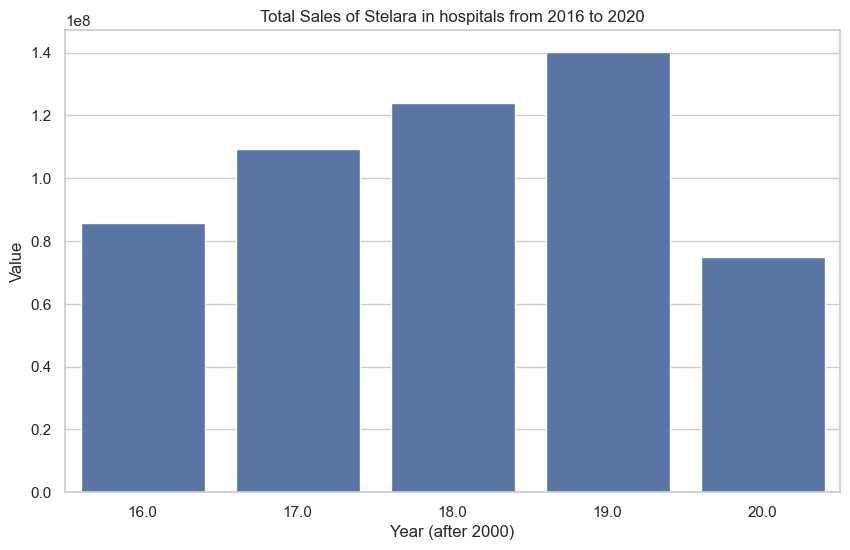

In [33]:
# draw a diagram to show sum(SortedDf['Value']) of Stelara from 2016 to 2020
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Year (after 2000)', y='Value', data=SortedDf, estimator=sum, errorbar=None)
plt.title('Total Sales of Stelara in hospitals from 2016 to 2020')
plt.show()